<a href="https://colab.research.google.com/github/KYOH95/Project_4_Boardgame_App_Ver2/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 구글 드라이브로부터 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os

#데이터 세트(캐글): https://www.kaggle.com/datasets/extralime/20000-boardgames-dataset
dir = './drive/MyDrive/Project4'
filename = os.listdir(dir)

csv_path = os.path.join(dir, filename[0])
df = pd.read_csv(csv_path)
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
0,0,boardgame,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,Pandemic,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,boardgame,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile-placement game in which ...,2000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,boardgame,13,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,Catan,"['CATAN', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(21631, 56)

##1. 데이터 전처리

####1-1. 불필요한 컬럼(특성) 제거

In [4]:
#make meaningful dataframe with valualble columns from the whole dataset
df = df[["id","thumbnail","image","primary","description","yearpublished","minplayers","maxplayers","playingtime","minplaytime",
    "maxplaytime","minage","boardgamecategory","usersrated","average","Board Game Rank","averageweight"]]
df.shape

(21631, 17)

####1-3. 결측치 제거

In [5]:
df.isnull().sum()

id                     0
thumbnail             15
image                 15
primary                0
description            1
yearpublished          0
minplayers             0
maxplayers             0
playingtime            0
minplaytime            0
maxplaytime            0
minage                 0
boardgamecategory    283
usersrated             0
average                0
Board Game Rank        0
averageweight          0
dtype: int64

In [6]:
#Remove null values
df = df.dropna(axis = 0)
df.shape

(21333, 17)

####1-3. 이상치 제거

In [7]:
# remove games which published year are below 1900 or above 2022
condition = (df["yearpublished"]<1900)|(df["yearpublished"]>2022)
df.drop(df.loc[condition].index, inplace=True)
df.shape

(21040, 17)

In [8]:
# remove games which minimun players are below 1 or maximum players are lower than minplayers
condition = (df["minplayers"]<=0)|(df["maxplayers"]<df["minplayers"])
df.drop(df.loc[condition].index, inplace=True)
df.shape

(20882, 17)

In [9]:
# remove games which both minimun play time and maximum play time are 0
condition = (df["minplaytime"]==0)&(df["maxplaytime"]==0)
df.drop(df.loc[condition].index, inplace=True)
df.shape

(20358, 17)

In [10]:
# remove games if min_play_time and max_play_time were put in opposite way
condition = (df["maxplaytime"]<df["minplaytime"])
df.drop(df.loc[condition].index, inplace=True)
df.shape

(20216, 17)

In [11]:
# Check games if average below 1
condition = (df["averageweight"]<1)
df.drop(df.loc[condition].index, inplace=True)
df.shape

(19804, 17)

In [12]:
# Check games if minage below 0 or above 200
condition = (df["minage"]<0)|(df["minage"]>200)
df[condition]

# Check games if usersrated below 0
condition = (df["usersrated"]<=0)
df[condition]

# Check games if average below 0
condition = (df["average"]<=0)
df[condition]
df.shape

(19804, 17)

1-4. 중복 데이터 제거

In [13]:
#check any duplicated data set
df.duplicated().sum()

0

##2. 학습 할 "description" 데이터 프레임 전처리

In [14]:
#데이터 평가 많은 순으로 sort
df.sort_values(by=["usersrated","average"],ascending=[False,False])
df.head(3)

,id,thumbnail,image,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,boardgamecategory,usersrated,average,Board Game Rank,averageweight
0,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,8,['Medical'],109006,7.58896,106,2.4063
1,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,7,"['City Building', 'Medieval', 'Territory Build...",108776,7.41837,191,1.9057
2,13,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,10,"['Economic', 'Negotiation']",108064,7.13598,429,2.3130


In [15]:
#new data set for DLM
df_description = df[["id","primary","description"]]
df_description.head(3)

,id,primary,description
0,30549,Pandemic,"In Pandemic, several virulent diseases have br..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla..."


In [16]:
df_description = df_description[0:1000]
df_description.shape

(1000, 3)

####2-1. 텍스트 기반으로 토큰에 넣기

In [17]:
#spacy 이용하여 tokenzing
import spacy
from spacy.tokenizer import Tokenizer
import re

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

subst = ""
regex = r"[^a-zA-Z0-9 \n]"

def tokenize(text):
    # Regex
    tokens = re.sub(";", " ", text)
    tokens = re.sub(regex, subst, tokens)
    # Lower
    tokens = tokens.lower().split()
    
    return tokens

####2-2. 토큰 정제(Regex, Lower)

In [18]:
df_token = df_description.copy()
df_token['tokens'] = df_token['description'].apply(tokenize)

df_token.head(5)

,id,primary,description,tokens
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[in, pandemic, several, virulent, diseases, ha..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonne, is, a, tileplacement, game, in, ..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[in, catan, formerly, the, settlers, of, catan..."
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,"[you, are, the, leader, of, one, of, the, 7, g..."
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...","[quot, you, are, a, monarch, like, your, paren..."


####2-3. 토큰 시각화(중간 점검)

In [19]:
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

wc = word_count(df_token['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
85,the,1000,17967,1.0,0.071086,0.071086,1.000
120,of,985,7773,2.0,0.030754,0.101840,0.985
73,to,980,7133,3.0,0.028222,0.130061,0.980
67,and,986,6908,4.0,0.027331,0.157393,0.986
130,a,968,6204,5.0,0.024546,0.181939,0.968


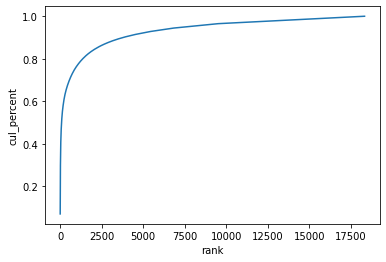

In [20]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [21]:
wc[wc['rank'] <= 3000]['cul_percent'].max()

0.8801899109792217

####2-4. 불용어(Stop words)

In [22]:
STOP_WORDS = nlp.Defaults.stop_words.union(['9','10','game','boardgame','quot','\n','\n\n'])


tokens = []
# 토큰에서 불용어 제거, 소문자화 하여 업데이트
for doc in df_token['tokens']:
    doc_tokens = []

    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)

    tokens.append(doc_tokens)

df_token['tokens'] = tokens
word_count(df_token['tokens']).head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
21,players,825,2419,1.0,0.019556,0.019556,0.825
24,cards,505,1828,2.0,0.014778,0.034334,0.505
59,player,632,1669,3.0,0.013493,0.047827,0.632
178,card,355,1015,4.0,0.008206,0.056033,0.355
95,new,422,794,5.0,0.006419,0.062451,0.422
135,points,365,717,6.0,0.005796,0.068248,0.365
373,play,396,673,7.0,0.005441,0.073689,0.396
56,board,343,586,8.0,0.004737,0.078426,0.343
32,turn,376,580,9.0,0.004689,0.083115,0.376
557,different,294,437,10.0,0.003533,0.086648,0.294


####2-5. 표제어 추출(Stemming)

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df_token['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df_token['tokens'] = tokens

In [24]:
df_token

,id,primary,description,tokens
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo..."
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,"[leader, 7, great, citi, ancient, world, gathe..."
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...","[monarch, like, parent, ruler, small, pleasant..."
...,...,...,...,...
1014,165950,Beasty Bar,The animals are dressed up and ready to enter ...,"[anim, dress, readi, enter, beasti, barquot, n..."
1015,249,Lifeboats,Also known as 'Rette Sich Wer Kann' ('Each Man...,"[known, rett, sich, wer, kann, man, time, refe..."
1016,340,Frank's Zoo,This game is played in several hands. In each ...,"[play, hand, hand, player, tri, rid, card, sco..."
1017,144797,Argent: The Consortium,The time has come for the selection of a new C...,"[time, come, select, new, chancellor, argent, ..."


####2-6. 토큰 시각화(SpaCy)

In [25]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


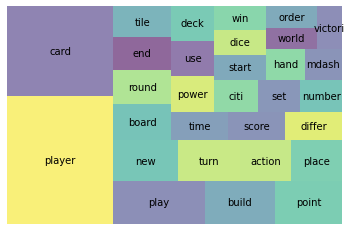

In [26]:
import spacy
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
# nlp = spacy.load("en_core_web_sm")

wc = word_count(df_token['tokens'])
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

####2-7. 통계적 트리밍(Trimming)

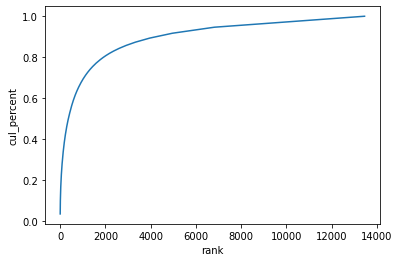

In [27]:
sns.lineplot(x='rank', y='cul_percent', data=wc);

In [28]:
wc.tail(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
13432,sharks10,1,1,13441.0,0.000008,0.999927,0.001
13439,partners10,1,1,13442.0,0.000008,0.999935,0.001
13438,hedgehog10,1,1,13443.0,0.000008,0.999943,0.001
13444,indines10,1,1,13444.0,0.000008,0.999951,0.001
13440,workerplacementenginebuild,1,1,13445.0,0.000008,0.999960,0.001
13445,europeanstyl,1,1,13446.0,0.000008,0.999968,0.001
13442,erratatypofaq,1,1,13447.0,0.000008,0.999976,0.001
13447,harbormast,1,1,13448.0,0.000008,0.999984,0.001
13446,predefin,1,1,13449.0,0.000008,0.999992,0.001
13448,laboralik,1,1,13450.0,0.000008,1.000000,0.001


In [29]:
wc['word_in_docs_percent'].describe()

count    13450.000000
mean         0.006266
std          0.022075
min          0.001000
25%          0.001000
50%          0.001000
75%          0.003000
max          0.901000
Name: word_in_docs_percent, dtype: float64

In [30]:
wc['word_in_docs_percent']

48       0.901
17       0.557
138      0.531
63       0.344
117      0.397
         ...  
13445    0.001
13442    0.001
13447    0.001
13446    0.001
13448    0.001
Name: word_in_docs_percent, Length: 13450, dtype: float64

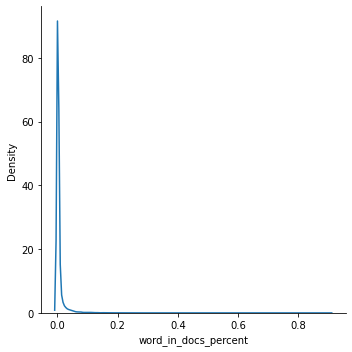

In [31]:
# 문서에 나타나는 빈도
sns.displot(wc['word_in_docs_percent'],kind='kde')

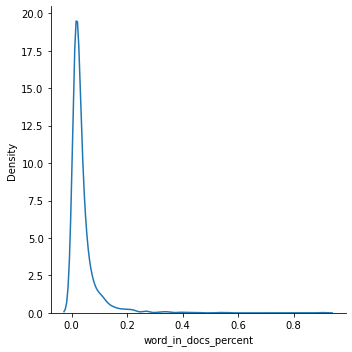

In [32]:
# 최소한 1% 이상 문서에 나타나는 단어들만 선택합니다.

wc = wc[wc['word_in_docs_percent'] >= 0.01]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [33]:
wc

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
48,player,901,4088,1.0,0.033049,0.033049,0.901
17,card,557,2843,2.0,0.022984,0.056033,0.557
138,play,531,1163,3.0,0.009402,0.065435,0.531
63,build,344,897,4.0,0.007252,0.072686,0.344
117,point,397,852,5.0,0.006888,0.079574,0.397
...,...,...,...,...,...,...,...
4433,northern,10,10,1903.0,0.000081,0.798660,0.010
4420,signific,10,10,1904.0,0.000081,0.798740,0.010
4821,lucr,10,10,1907.0,0.000081,0.798983,0.010
5029,undead,10,10,1909.0,0.000081,0.799145,0.010


##3. Embedding

####3-1. One-hot Encoding

In [72]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb

In [73]:
df_token.head(3)

,id,primary,description,tokens,encoded
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl...","[902, 6752, 741, 1352, 522, 28, 1, 4891, 1001,..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti...","[1131, 3890, 1, 43, 9, 13, 69, 2842, 1353, 845..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo...","[680, 1132, 680, 1, 42, 436, 100, 123, 680, 4,..."


In [92]:
X = df_token["tokens"]
y = df_token["id"]

In [75]:
tokenizer = Tokenizer(num_words=10000) #num_words를 단어 빈도수가 높은 순으로 100개만 사용한다는 의미이다. 나머지는 고려하지 않는다.
tokenizer.fit_on_texts(X)
X_encoded = df_token["encoded"] = tokenizer.texts_to_sequences(X)
df_token.head(3)

,id,primary,description,tokens,encoded
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl...","[902, 6752, 741, 1352, 522, 28, 1, 4891, 1001,..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti...","[1131, 3890, 1, 43, 9, 13, 69, 2842, 1353, 845..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo...","[680, 1132, 680, 1, 42, 436, 100, 123, 680, 4,..."


In [76]:
#get vocab_size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

#get max_len
np.mean([len(sent) for sent in X_encoded], dtype=int)

13451


120

In [77]:
#transform using pad_sequences
maxlen = 200 # bigger than mean of len of X
print(len(X_encoded))
X_pad = pad_sequences(X_encoded, maxlen=maxlen)
X_pad.shape

1000


(1000, 200)

In [79]:
X_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  902, 6752,  741,
       1352,  522,   28,    1, 4891, 1001,  231, 1947,  741, 3888,  448,
       1417,  970, 1032,   10,  513,  400,  350,  514,  363,    7,    1,
         18,    8,  171,   20, 1947, 2287, 2288,  266, 1417,    4,  448,
        843,   19,    2,  134,    1,   70, 6753,   19, 3255,    2, 3256,
       3889,  741,  161,  136,  698,   19,    2,   44, 6754,  588, 6755,
         37,   57,   51,   63,    1,  109,  119, 3257, 1001,  250,   29,
        449,  741,  434,  903, 1500,    4,  448,  8

####3-2. Word2Vec

In [42]:
!pip install gensim --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [43]:
import gensim

gensim.__version__

'4.2.0'

In [45]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [46]:
#get embedding_matrix using by Word2Vec
import numpy as np
embedding_matrix = np.zeros((vocab_size, 300))
def get_vector(word):
    if word in wv:
        return wv[word]
    else:
        return None

for word, i in tokenizer.word_index.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp

In [47]:
oov = []
for word, _ in tokenizer.word_index.items():
    if word not in wv:
        oov.append(word)
print(len(oov))
print(len(tokenizer.word_index.items()))
print(oov[0])

7822
13450
victori


####3-3. fastText

In [50]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# Set file names for train and test data
corpus_file = datapath('lee_background.cor')

model = FastText(vector_size=300)

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

ft = model.wv

In [51]:
#get embedding_matrix using by Word2Vec
import numpy as np
embedding_matrix = np.zeros((vocab_size, 300))
def get_vector(word):
    if word in ft:
        return ft[word]
    else:
        return None

for word, i in tokenizer.word_index.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp


In [52]:
oov = []
for word, _ in tokenizer.word_index.items():
    if word not in ft:
        oov.append(word)
print(len(oov))
print(len(tokenizer.word_index.items()))

0
13450


In [62]:
embedding_matrix.shape

(13451, 300)

In [66]:
embedding_matrix[1]

array([-0.02223942,  0.10753269, -0.13607696,  0.05959906, -0.05546411,
       -0.08177526, -0.09630185,  0.26831463,  0.22939341, -0.00147732,
       -0.21900928, -0.09713133, -0.1463182 , -0.06441765,  0.00919696,
        0.01273943,  0.07688658, -0.07220789,  0.10315868,  0.09225721,
       -0.27128917,  0.24582213,  0.01926414, -0.17068642,  0.41322458,
        0.11190569, -0.01202021, -0.04629523, -0.14669189, -0.24431992,
       -0.01271125,  0.07723676, -0.05803743,  0.04236901, -0.11776418,
       -0.10018932,  0.02654234, -0.14847034,  0.25257555,  0.05386871,
       -0.03103934,  0.00424456,  0.05680434, -0.31934574,  0.02804153,
       -0.03135979, -0.16272661,  0.38622582, -0.01427413,  0.14548273,
        0.19886476,  0.03256987,  0.07813141, -0.03815904, -0.11841545,
        0.06784531,  0.03330021,  0.05385832,  0.00508921, -0.16010322,
        0.17219618, -0.17750138, -0.25812316, -0.00113951,  0.0246145 ,
       -0.09515933, -0.16399074, -0.16007596, -0.26167294, -0.14

In [68]:
df_token

,id,primary,description,tokens,encoded
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl...","[902, 6752, 741, 1352, 522, 28, 1, 4891, 1001,..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti...","[1131, 3890, 1, 43, 9, 13, 69, 2842, 1353, 845..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo...","[680, 1132, 680, 1, 42, 436, 100, 123, 680, 4,..."
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,"[leader, 7, great, citi, ancient, world, gathe...","[263, 329, 111, 20, 209, 28, 220, 32, 110, 169..."
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...","[monarch, like, parent, ruler, small, pleasant...","[1818, 84, 1819, 1420, 210, 3263, 217, 642, 49..."
...,...,...,...,...,...
1014,165950,Beasty Bar,The animals are dressed up and ready to enter ...,"[anim, dress, readi, enter, beasti, barquot, n...","[213, 2059, 545, 473, 6749, 644, 6749, 2442, 5..."
1015,249,Lifeboats,Also known as 'Rette Sich Wer Kann' ('Each Man...,"[known, rett, sich, wer, kann, man, time, refe...","[359, 6533, 849, 14, 1226, 6750, 1749, 822, 81..."
1016,340,Frank's Zoo,This game is played in several hands. In each ...,"[play, hand, hand, player, tri, rid, card, sco...","[3, 26, 26, 1, 42, 937, 2, 15, 46, 656, 26, 93..."
1017,144797,Argent: The Consortium,The time has come for the selection of a new C...,"[time, come, select, new, chancellor, argent, ...","[14, 66, 147, 6, 4205, 4889, 535, 198, 84, 279..."


In [101]:
X_pad.shape

(1000, 200)

##4. Modeling

####4-1. 

In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import RMSprop

In [100]:
embedding_matrix.shape

(13451, 300)

In [93]:
type(X_pad)

numpy.ndarray

In [90]:
y.shape

(1000,)

In [94]:
len(pd.unique(y))

1000

In [110]:
model = Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(GlobalAveragePooling1D()) 
model.add(tf.keras.layers.Dense(100, activation='relu')) 
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 300)          4035300   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,065,501
Trainable params: 30,201
Non-trainable params: 4,035,300
_________________________________________________________________


In [111]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='MSE', optimizer=optimizer)

In [108]:
df_token

,id,primary,description,tokens,encoded
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl...","[902, 6752, 741, 1352, 522, 28, 1, 4891, 1001,..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti...","[1131, 3890, 1, 43, 9, 13, 69, 2842, 1353, 845..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo...","[680, 1132, 680, 1, 42, 436, 100, 123, 680, 4,..."
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,"[leader, 7, great, citi, ancient, world, gathe...","[263, 329, 111, 20, 209, 28, 220, 32, 110, 169..."
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...","[monarch, like, parent, ruler, small, pleasant...","[1818, 84, 1819, 1420, 210, 3263, 217, 642, 49..."
...,...,...,...,...,...
1014,165950,Beasty Bar,The animals are dressed up and ready to enter ...,"[anim, dress, readi, enter, beasti, barquot, n...","[213, 2059, 545, 473, 6749, 644, 6749, 2442, 5..."
1015,249,Lifeboats,Also known as 'Rette Sich Wer Kann' ('Each Man...,"[known, rett, sich, wer, kann, man, time, refe...","[359, 6533, 849, 14, 1226, 6750, 1749, 822, 81..."
1016,340,Frank's Zoo,This game is played in several hands. In each ...,"[play, hand, hand, player, tri, rid, card, sco...","[3, 26, 26, 1, 42, 937, 2, 15, 46, 656, 26, 93..."
1017,144797,Argent: The Consortium,The time has come for the selection of a new C...,"[time, come, select, new, chancellor, argent, ...","[14, 66, 147, 6, 4205, 4889, 535, 198, 84, 279..."


In [109]:
y

0        30549
1          822
2           13
3        68448
4        36218
         ...  
1014    165950
1015       249
1016       340
1017    144797
1018    129051
Name: id, Length: 1000, dtype: int64

In [112]:
model.fit(X_pad, y, batch_size=64, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 5ms/step - loss: 21147056128.0000
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 21129101312.0000
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 21104676864.0000
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 21073772544.0000
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 21036965888.0000
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 20994955264.0000
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 20946167808.0000
Epoch 8/10
16/16 [==============================] - 0s 5ms/step - loss: 20891846656.0000
Epoch 9/10
16/16 [==============================] - 0s 5ms/step - loss: 20831494144.0000
Epoch 10/10
16/16 [==============================] - 0s 4ms/step - loss: 20765132800.0000


In [113]:
model.predict(X_pad)

array([[2232.7869 ],
       [1551.9141 ],
       [3214.9543 ],
       [2197.5098 ],
       [2135.7434 ],
       [2210.7327 ],
       [1060.386  ],
       [3169.4553 ],
       [2541.9563 ],
       [2690.6772 ],
       [3035.5725 ],
       [1625.4185 ],
       [3128.8628 ],
       [1979.3995 ],
       [2022.0944 ],
       [1352.0985 ],
       [1752.103  ],
       [1368.2714 ],
       [2012.6079 ],
       [1310.4456 ],
       [1408.5792 ],
       [3303.7024 ],
       [3489.3848 ],
       [3022.304  ],
       [1847.0405 ],
       [1760.3064 ],
       [2124.9143 ],
       [1929.4602 ],
       [2740.6484 ],
       [2758.876  ],
       [2672.9553 ],
       [2840.4312 ],
       [2454.1165 ],
       [1389.6682 ],
       [2819.1497 ],
       [1672.4014 ],
       [3274.459  ],
       [1892.6127 ],
       [2970.2795 ],
       [3227.444  ],
       [3347.823  ],
       [1583.4465 ],
       [1150.8206 ],
       [2624.194  ],
       [1881.5393 ],
       [2456.8074 ],
       [2991.3384 ],
       [1352.

In [116]:
#함수형 API
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

# input = Input(shape=200)

Embedding = tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False)(X_pad)
output = GlobalAveragePooling1D()(Embedding)



In [114]:
X_pad.shape

(1000, 200)

In [117]:
output

<tf.Tensor: shape=(1000, 300), dtype=float32, numpy=
array([[-0.01201942,  0.05795917, -0.07320353, ...,  0.03464763,
         0.0090465 , -0.01911381],
       [-0.00808532,  0.03927098, -0.04967961, ...,  0.02348114,
         0.00613312, -0.0129941 ],
       [-0.01748541,  0.08483501, -0.1073526 , ...,  0.05080693,
         0.01327446, -0.02804057],
       ...,
       [-0.00568288,  0.0279375 , -0.03541901, ...,  0.01680656,
         0.00437506, -0.0092406 ],
       [-0.00744965,  0.03631208, -0.04599812, ...,  0.02177561,
         0.00558073, -0.01199325],
       [-0.01123564,  0.05477319, -0.06937739, ...,  0.03279239,
         0.00850031, -0.0181276 ]], dtype=float32)>

In [ ]:
#왜 fasttext를 사용했는지?
# 결과가 잘 나왔는지? 어떻게 평가할것인지?
# 과정이 닮겨야한다.